In [1]:
# import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as mt
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
# load dataset
data = pd.read_excel("C:/Users/nakka/Documents/python/Projects/crop.xlsx")
data

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     2200 non-null   int64  
 1   PHOSPHORUS   2200 non-null   int64  
 2   POTASSIUM    2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   PH           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   CROP         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
data.describe()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
pd.isnull(data).sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

In [6]:
data.nunique()

NITROGEN        137
PHOSPHORUS      117
POTASSIUM        73
TEMPERATURE    2200
HUMIDITY       2200
PH             2200
RAINFALL       2200
CROP             22
dtype: int64

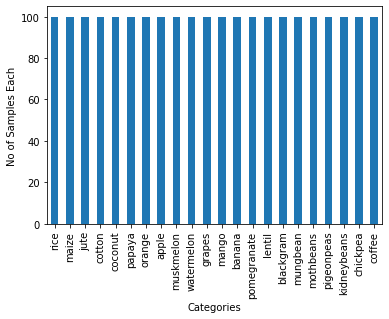

In [7]:
#No. of categories vs No. of samples
labels = data["CROP"].unique()
data["CROP"].value_counts().plot(kind="bar")
plt.xlabel('Categories')
plt.ylabel('No of Samples Each')
plt.show()

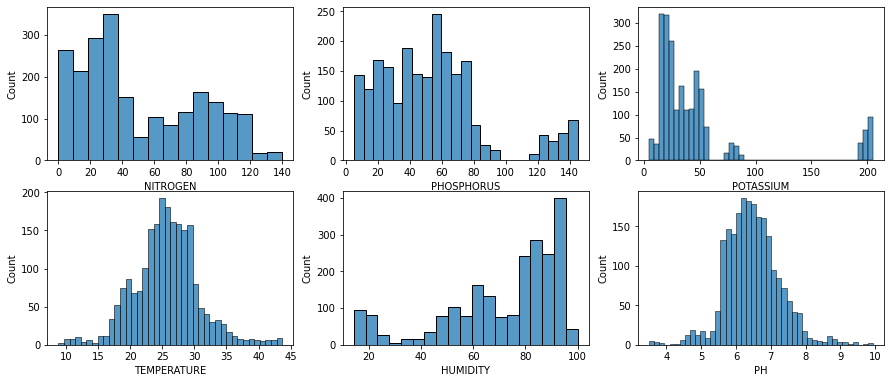

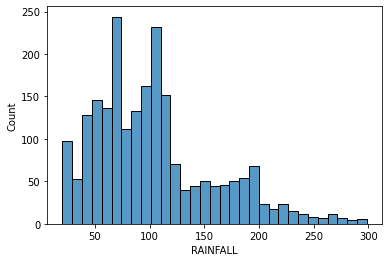

In [8]:
#Range of Values Vs Count for Each Parameter
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(4,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

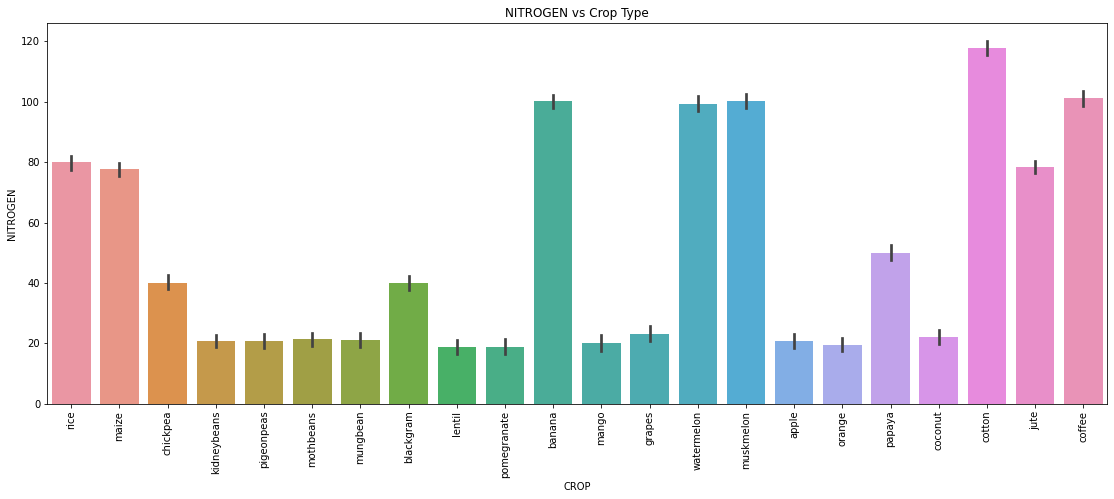

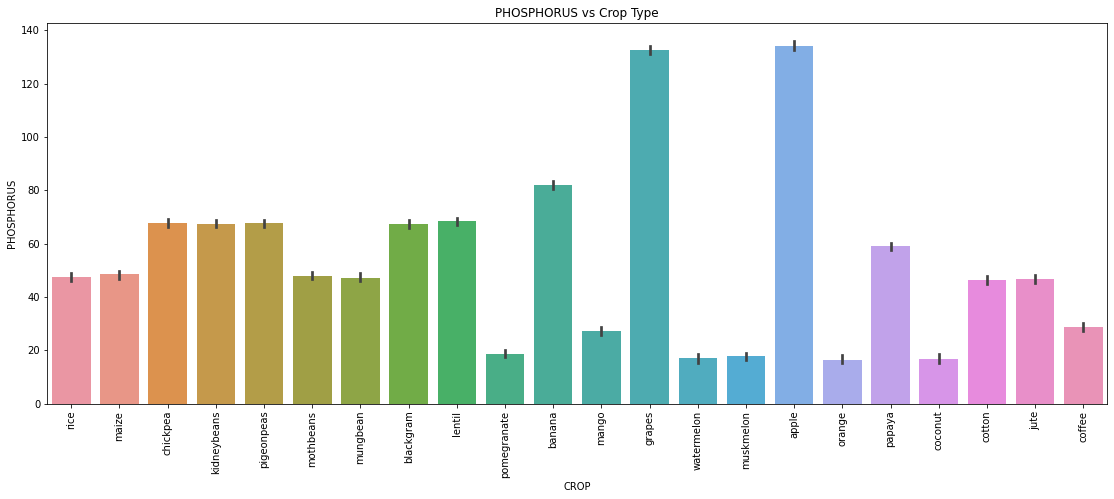

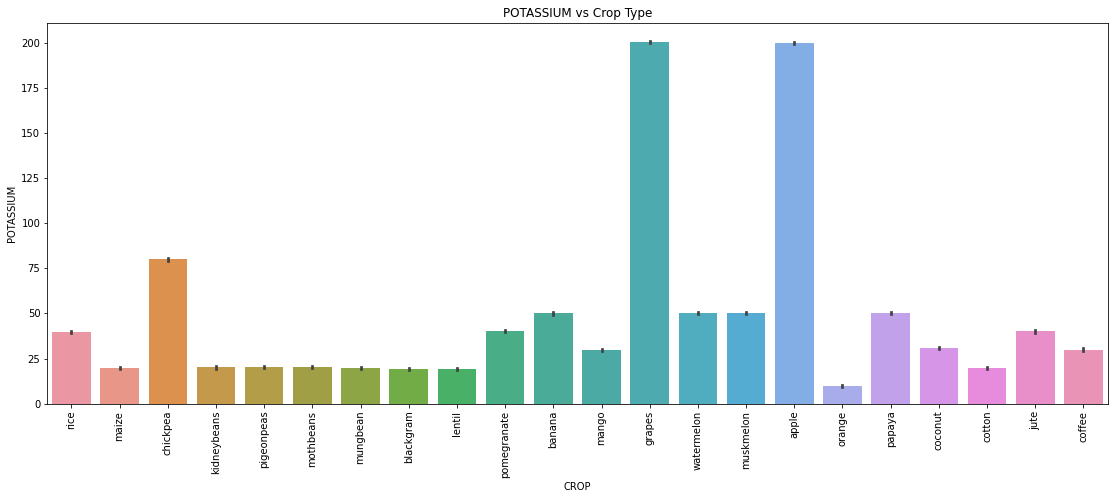

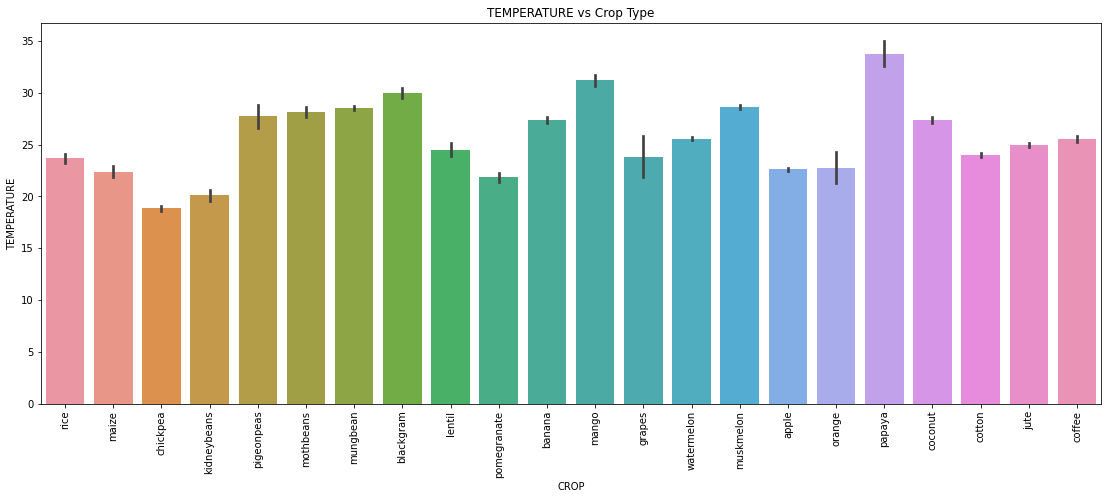

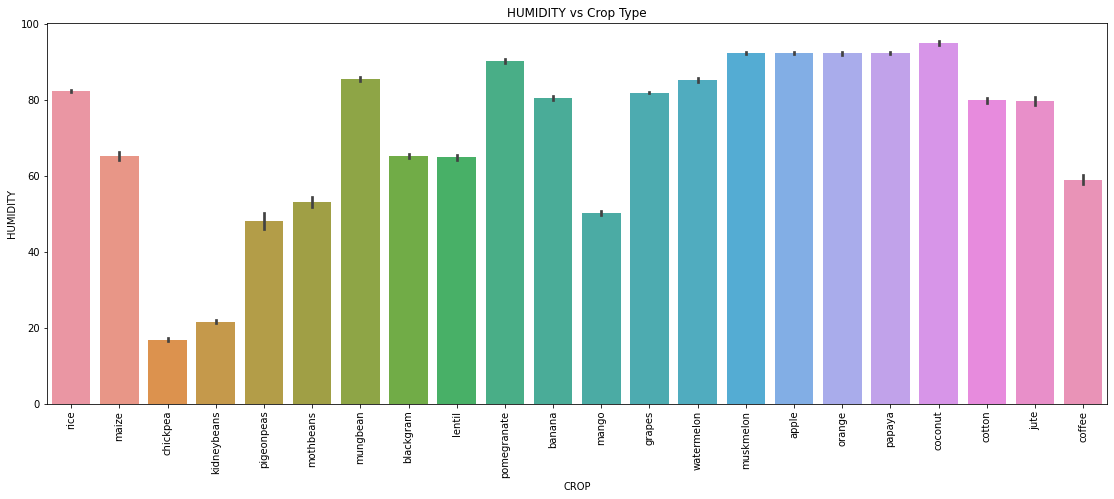

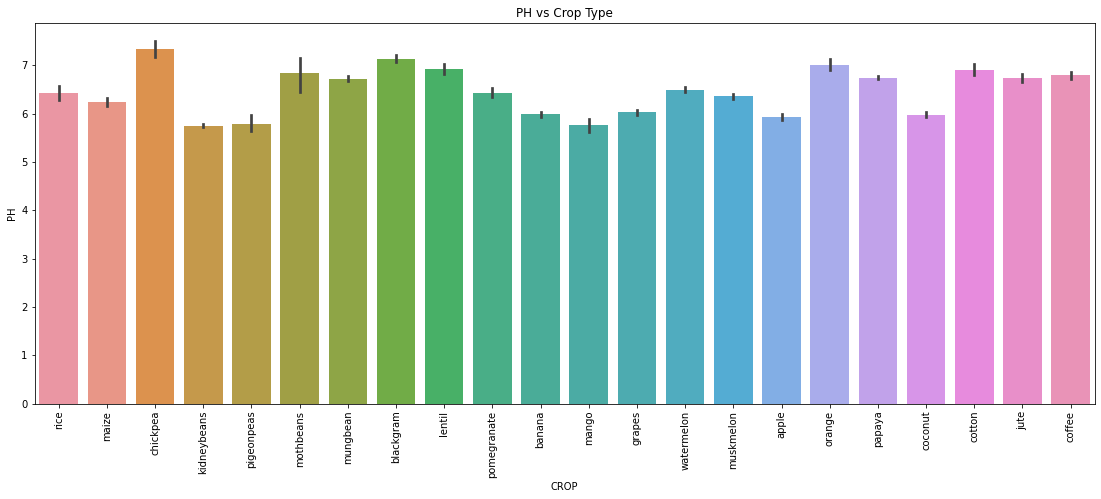

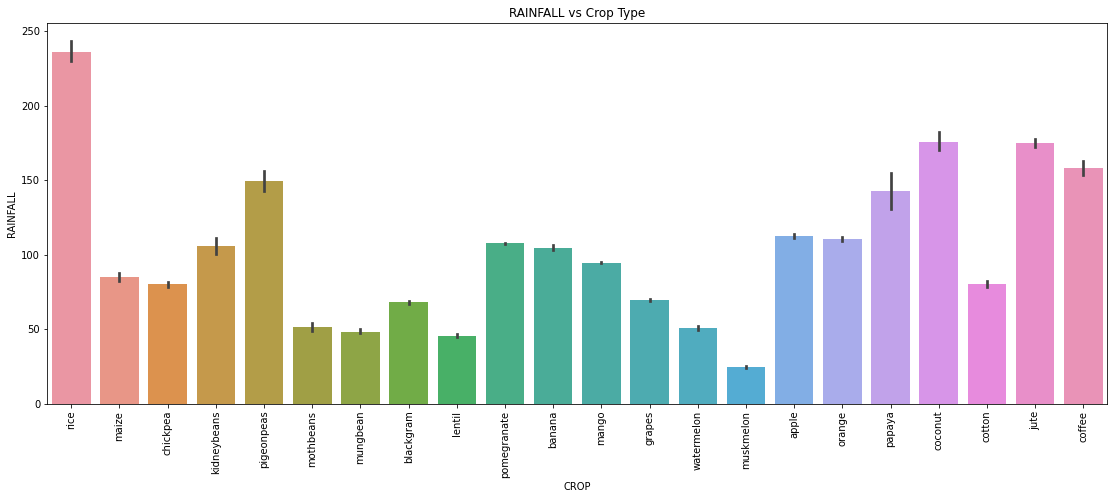

In [9]:
#Parameter Values vs Crop Type
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "CROP", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

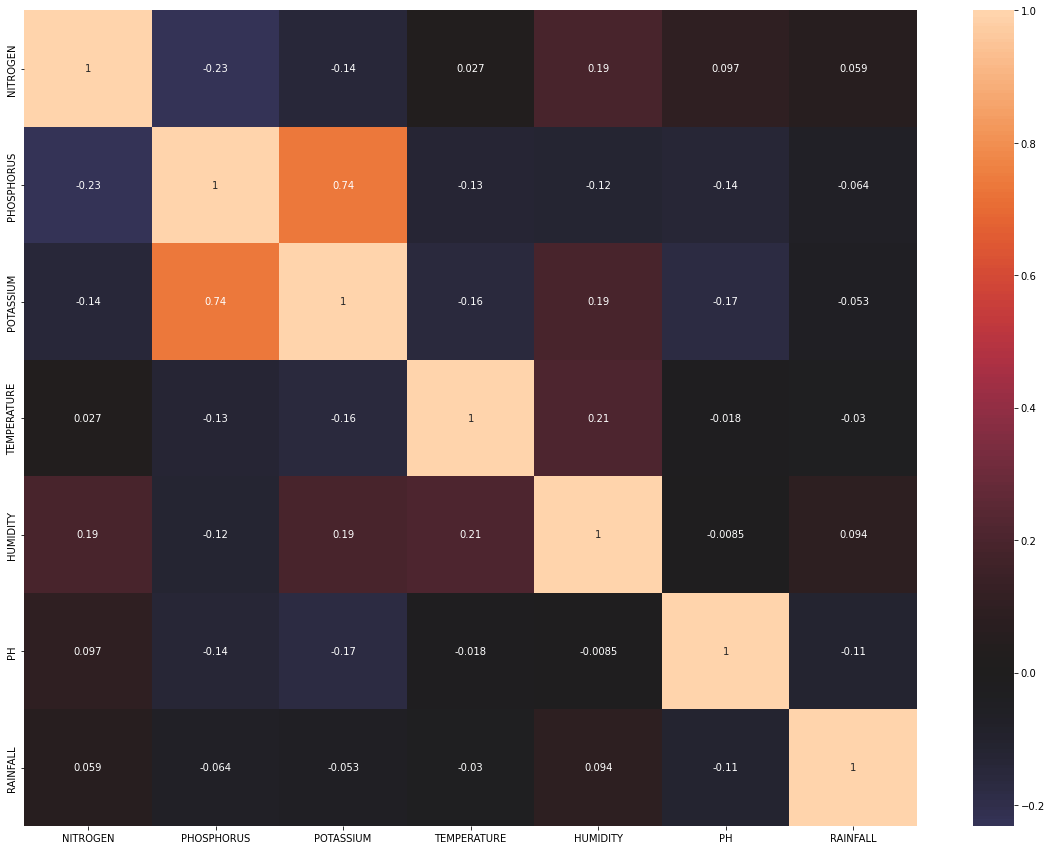

In [10]:
#Correlation Matrix Using Heat Map
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

In [11]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.CROP)
print(data.label)

[20 20 20 ...  5  5  5]


C:\Users\nakka\AppData\Local\Temp\ipykernel_14676\1785991719.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.label = encoder.fit_transform(data.CROP)


In [12]:
for i in range(2200):
  print(data.label[i])

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [13]:
features = data.drop("CROP", axis=1)
target = data.label

Class=20, n=500 (4.545%)
Class=11, n=500 (4.545%)
Class=3, n=500 (4.545%)
Class=9, n=500 (4.545%)
Class=18, n=500 (4.545%)
Class=13, n=500 (4.545%)
Class=14, n=500 (4.545%)
Class=2, n=500 (4.545%)
Class=10, n=500 (4.545%)
Class=19, n=500 (4.545%)
Class=1, n=500 (4.545%)
Class=12, n=500 (4.545%)
Class=7, n=500 (4.545%)
Class=21, n=500 (4.545%)
Class=15, n=500 (4.545%)
Class=0, n=500 (4.545%)
Class=16, n=500 (4.545%)
Class=17, n=500 (4.545%)
Class=4, n=500 (4.545%)
Class=6, n=500 (4.545%)
Class=8, n=500 (4.545%)
Class=5, n=500 (4.545%)


c:\Users\nakka\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 100)
  warnings.warn(
c:\Users\nakka\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 1 will be larger than the number of samples in the majority class (class #0 -> 100)
  warnings.warn(
c:\Users\nakka\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (500) in class 2 will be larger than the number of samples in the majority class (class #0 -> 100)
  warnings.warn(
c:\Users\nakka\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples 

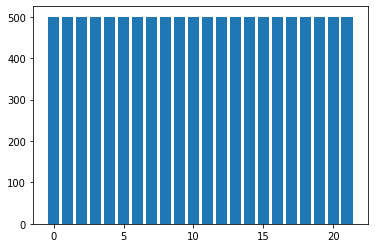

In [14]:
strategy = {0:500, 1:500, 2:500, 3:500, 4:500, 5:500, 6:500, 7:500, 8:500, 9:500, 10:500, 11:500, 12:500, 13:500, 14:500, 15:500, 16:500, 17:500, 18:500, 19:500, 20:500, 21:500}# transform the dataset
oversample = SMOTE(sampling_strategy=strategy)
features, target = oversample.fit_resample(features, target)
# summarize distribution
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [15]:
print(len(features))
print(len(target))
features.info()

11000
11000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     11000 non-null  int64  
 1   PHOSPHORUS   11000 non-null  int64  
 2   POTASSIUM    11000 non-null  int64  
 3   TEMPERATURE  11000 non-null  float64
 4   HUMIDITY     11000 non-null  float64
 5   PH           11000 non-null  float64
 6   RAINFALL     11000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 601.7 KB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

In [18]:
# Create Random Forest classifer object
rf = RandomForestClassifier(criterion="entropy", max_depth=7)

# Train Random Forest Classifer
rf = rf.fit(X_train,y_train)

#Predict the response for train & test dataset
y_pred_test_rf = rf.predict(X_test)
y_pred_train_rf = rf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test_rf))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train_rf))

Testing Accuracy: 0.9963636363636363
Training Accuracy: 0.9960606060606061


In [19]:
print(metrics.confusion_matrix(y_test,y_pred_test_rf))
print(metrics.classification_report(y_test,y_pred_test_rf))

[[201   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 226   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0 195   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 201   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 194   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0 195   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 204   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 204   0   0   0   0   0   0 

In [20]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=9)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test_dt = dt.predict(X_test)
y_pred_train_dt = dt.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train_dt))

Testing Accuracy: 0.9922727272727273
Training Accuracy: 0.9940909090909091


In [21]:
# Create Support Vector Machine classifer object
svm = SVC()

# Train Support Vector Machine Classifer
svm = svm.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_test_svm = svm.predict(X_test)
y_pred_train_svm = svm.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test_svm))
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train_svm))

Testing Accuracy: 0.9875
Training Accuracy: 0.9890909090909091


In [22]:
y_pred = rf.predict(X_test)
y_pred

array([11,  8, 11, ...,  5, 21,  2])

In [23]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[201   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 195   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 226   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 202   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0 195   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 201   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 202   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0 194   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0 195   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 204   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 204   0   0   0   0   0   0 

In [24]:
import pickle
# Save the model
filename = 'CropReccomend.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [25]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['CROP'], axis='columns', inplace=True)

input_data.at[0, 'NITROGEN'] = float(input('Enter Nitrogen : '))
input_data.at[0, 'PHOSPHORUS'] = float(input('Enter Phosphorus : '))
input_data.at[0, 'POTASSIUM'] = float(input('Enter Potassium : '))
input_data.at[0, 'TEMPERATURE'] = float(input('Enter Temperature : '))
input_data.at[0, 'HUMIDITY'] = float(input('Enter Humidity : '))
input_data.at[0, 'PH'] = float(input('Enter PH : '))
input_data.at[0, 'RAINFALL'] = float(input('Enter Rainfall : '))

prediction = rf.predict(input_data)
result = prediction[0]
if(result == 20):
  print("Recommended crop is rice")
elif(result == 11):
  print("Recommended crop is maize")
elif(result == 3):
  print("Recommended crop is chickpea")
elif(result == 9):
  print("Recommended crop is kidneybeans")
elif(result == 18):
  print("Recommended crop is pigeonpeas")
elif(result == 13):
  print("Recommended crop is mothbeans")
elif(result == 14):
  print("Recommended crop is mungbean")
elif(result == 2):
  print("Recommended crop is blackgram")
elif(result == 10):
  print("Recommended crop is lentil")
elif(result == 19):
  print("Recommended crop is pomegranate")
elif(result == 1):
  print("Recommended crop is banana")
elif(result == 12):
  print("Recommended crop is mango")
elif(result == 7):
  print("Recommended crop is grapes")
elif(result == 21):
  print("Recommended crop is watermelon")
elif(result == 15):
  print("Recommended crop is muskmelon")
elif(result == 0):
  print("Recommended crop is apple")
elif(result == 16):
  print("Recommended crop is orange")
elif(result == 17):
  print("Recommended crop is papaya")
elif(result == 4):
  print("Recommended crop is coconut")
elif(result == 6):
  print("Recommended crop is cotton")
elif(result == 8):
  print("Recommended crop is jute")
elif(result == 5):
  print("Recommended crop is coffee")

Recommended crop is mothbeans
